In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
object_col=df.select_dtypes(include='object')
object_col

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [7]:
object_value_count = object_col.count().sum()
print("Number of Records of object data type are:",object_value_count)

Number of Records of object data type are: 150


In [8]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


<Axes: xlabel='sepal_length', ylabel='Count'>

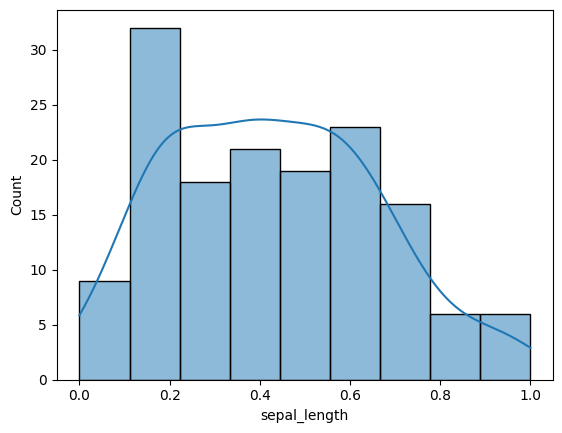

In [9]:
sns.histplot(x=df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

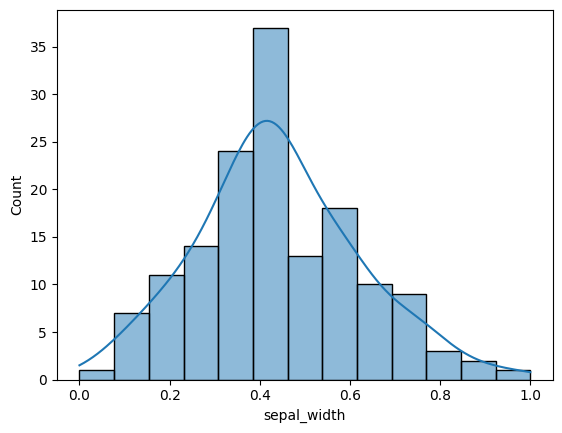

In [10]:
sns.histplot(x=df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

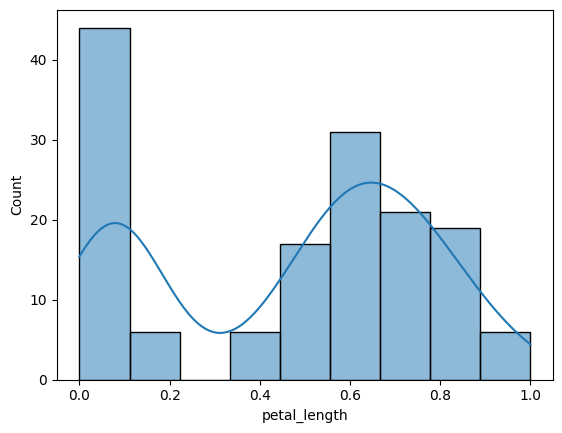

In [11]:
sns.histplot(x=df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

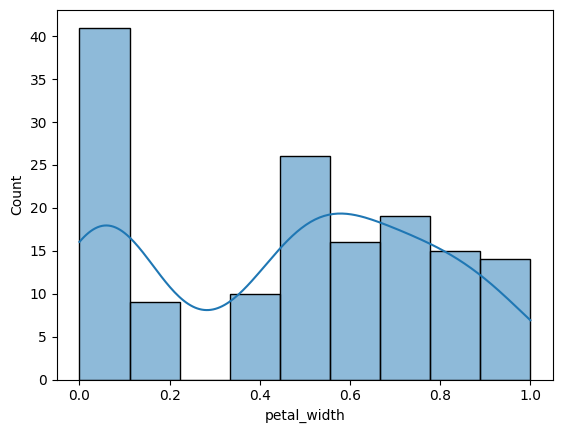

In [12]:
sns.histplot(x=df['petal_width'],kde=True)

Text(0.5, 1.0, 'Boxplot of Sepal length')

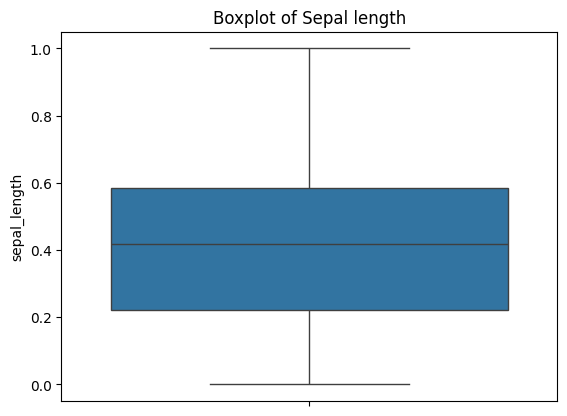

In [13]:
sns.boxplot(data=df['sepal_length'])
plt.title("Boxplot of Sepal length")


Text(0.5, 1.0, 'Boxplot of Sepal Width')

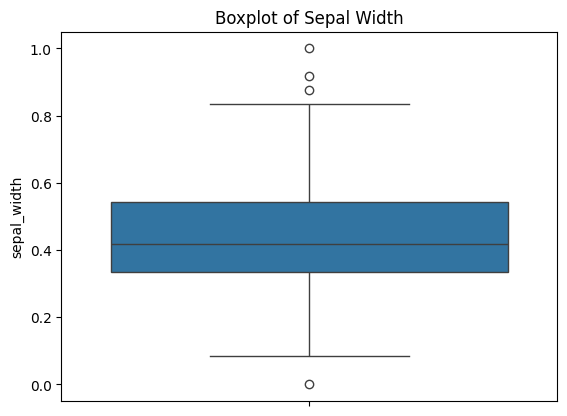

In [14]:
sns.boxplot(data=df['sepal_width'])
plt.title("Boxplot of Sepal Width")

Text(0.5, 1.0, 'Boxplot of Petal length')

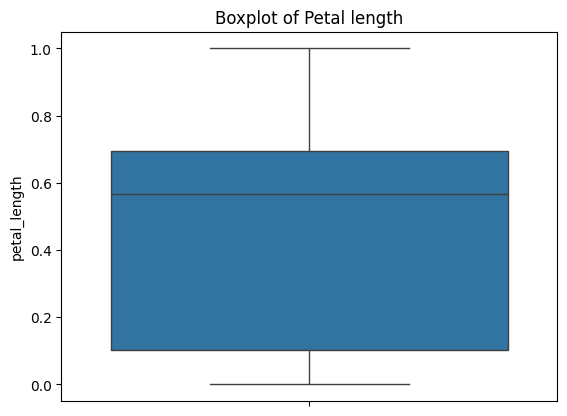

In [15]:
sns.boxplot(data=df['petal_length'])
plt.title("Boxplot of Petal length")

Text(0.5, 1.0, 'Boxplot of Petal Width')

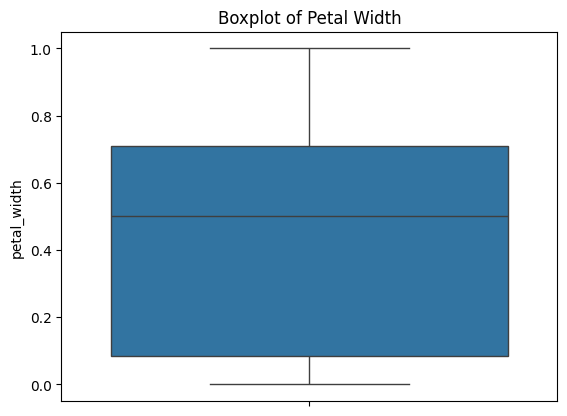

In [16]:
sns.boxplot(data=df['petal_width'])
plt.title("Boxplot of Petal Width")

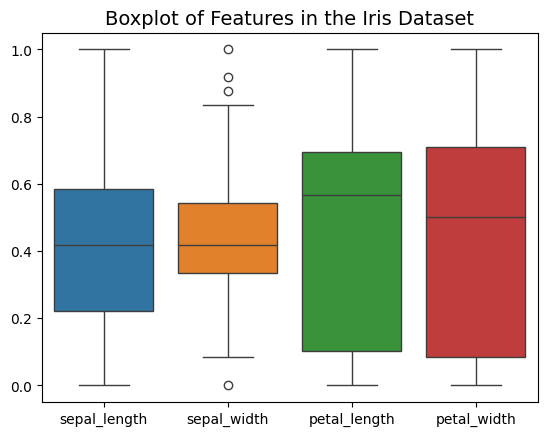

In [17]:
sns.boxplot(data=df)
plt.title("Boxplot of Features in the Iris Dataset", fontsize=14)
plt.show()

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


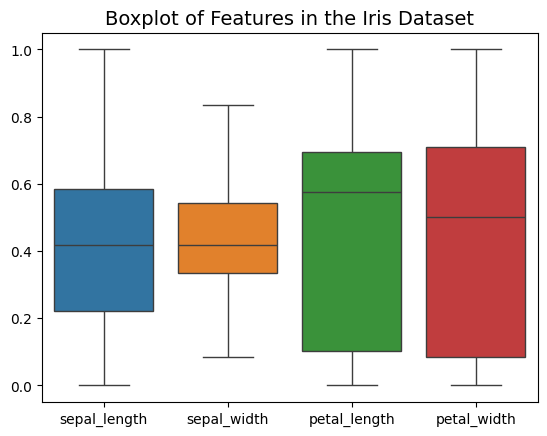

In [19]:
sns.boxplot(data=df)
plt.title("Boxplot of Features in the Iris Dataset", fontsize=14)
plt.show()